In [1]:
import pycountry_convert as pc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
'''AF=0
NA=0
OC=0
AN=0
AS=0
EU=0
SA=0

Cup=0
Pack=0
Tray=0
Bowl=0
Box=0
Can=0
Bar=0'''

'AF=0\nNA=0\nOC=0\nAN=0\nAS=0\nEU=0\nSA=0\n\nCup=0\nPack=0\nTray=0\nBowl=0\nBox=0\nCan=0\nBar=0'

In [3]:
raw_dataframe = pd.read_csv("ramen-ratings.csv")
raw_dataframe.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
raw_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null float64
Top Ten     41 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 141.2+ KB


In [5]:

def dropCols(df):
    df = df.drop("Review #",axis=1)
    df = df.drop("Top Ten",axis=1)
    return df

def edit_dataframe(df):
    df = dropCols(df)
    return df

new_data = edit_dataframe(raw_dataframe)

In [6]:
new_data.head()

,Brand,Variety,Style,Country,Stars
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75
4,Ching's Secret,Singapore Curry,Pack,India,3.75


In [7]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 5 columns):
Brand      2580 non-null object
Variety    2580 non-null object
Style      2578 non-null object
Country    2580 non-null object
Stars      2580 non-null float64
dtypes: float64(1), object(4)
memory usage: 100.9+ KB


In [8]:
def CountContinent(cc):
    global AF, NA, OC, AN, AS, EU, SA
    
    
    if (cc=="AF"):
        AF+=1
    elif (cc=="NA"):
        NA+=1
    elif(cc=="OC"):
        OC+=1
    elif(cc=="AN"):
        AN+=1
    elif(cc=="AS"):
        AS+=1
    elif(cc=="EU"):
        EU+=1
    elif(cc=="SA"):
        SA+=1
    else:
        None
        
def CountStyles(st):
    global Cup, Pack, Tray, Bowl, Box, Can, Bar, Other
    
    if (st=="Cup"):
        Cup+=1
    elif (st=="Pack"):
        Pack+=1
    elif(st=="Tray"):
        Tray+=1
    elif(st=="Bowl"):
        Bowl+=1
    elif(st=="Box"):
        Box+=1
    elif(st=="Can"):
        Can+=1
    elif(st=="Bar"):
        Bar+=1
    else:
        None

In [22]:
country_names = np.array(new_data.Country.unique())
new_data["Continent"] = None
for i in range(len(country_names)):
    country_code = pc.country_name_to_country_alpha2(country_names[i], cn_name_format="default")
    continent_code = pc.country_alpha2_to_continent_code(country_code)
    CountContinent(continent_code)
    
    print(country_names[i], continent_code)


Japan AS
Taiwan AS
USA NA
India AS
South Korea AS
Singapore AS
Thailand AS
Hong Kong AS
Vietnam AS
Ghana AF
Malaysia AS
Indonesia AS
China AS
Nigeria AF
Germany EU
Hungary EU
Mexico NA
Fiji OC
Australia OC
Pakistan AS
Bangladesh AS
Canada NA
Nepal AS
Brazil SA
United Kingdom EU
Myanmar AS
Netherlands EU
United States NA
Cambodia AS
Finland EU
Philippines AS
Sweden EU
Colombia SA
Estonia EU
Poland EU
United Arab Emirates AS


In [19]:
Cont_list=[AF, NA, OC, AN, AS, EU, SA]

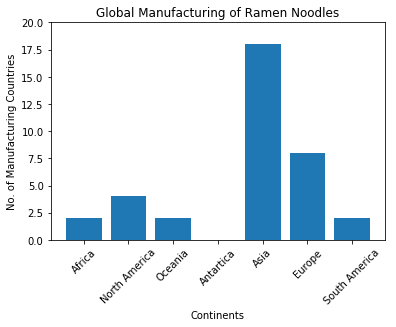

In [10]:
plt.ylim(0,20)
y = Cont_list
x = ["Africa", "North America", "Oceania", "Antartica", "Asia", "Europe", "South America"]      
plt.bar(x, y)
plt.xticks(rotation=45)
plt.title('Global Manufacturing of Ramen Noodles')
plt.xlabel('Continents') 
plt.ylabel('No. of Manufacturing Countries')
plt.show()


Unique Styles: 
['Cup' 'Pack' 'Tray' 'Bowl' 'Box' 'Can' 'Bar' nan]


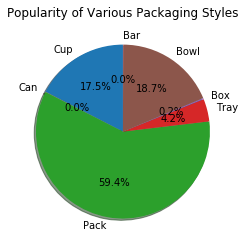

In [24]:
print("\nUnique Styles: ")
print(new_data.Style.unique())

for i in new_data.Style:
    CountStyles(i)

y = [Cup, Can, Pack, Tray, Box, Bowl, Bar]
x = ["Cup", "Can", "Pack", "Tray", "Box", "Bowl", "Bar"]      
plt.pie(y, labels=x, shadow=True,startangle=90, autopct="%1.1f%%")
plt.title('Popularity of Various Packaging Styles')
plt.show()


In [12]:
for i in y:
    print("Percentage of ", i , "=", (i/np.sum(y))*100)

Percentage of  450 = 17.455391776570988
Percentage of  1 = 0.038789759503491075
Percentage of  1531 = 59.38712179984484
Percentage of  108 = 4.189294026377036
Percentage of  6 = 0.23273855702094648
Percentage of  481 = 18.657874321179207
Percentage of  1 = 0.038789759503491075
